# Assignment 3

## Morphological Operations Implementation

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Data Loading

In [57]:
images = ['img_1.jpg', 'img_2.jpg', 'img_3.png']

In [58]:
kernel = np.ones((3,3), np.uint8)

In [59]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

### Built-In Implementation
using built-in OpenCV functions

In [60]:
operations = ['Original', 'Eroded', 'Dilated', 'Opened', 'Closed']

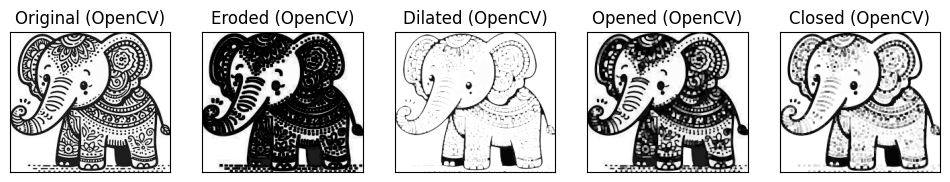

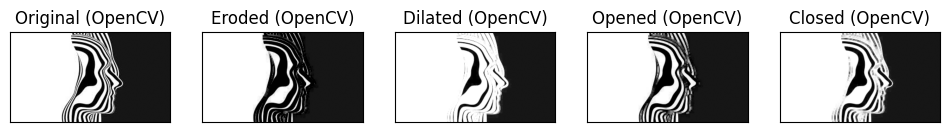

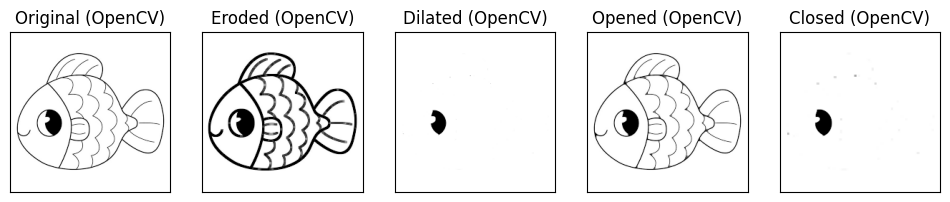

In [61]:
for img in images:
    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    #  Applying OpenCV's built-in morphological operations
    eroded_built_in= cv2.erode(image, kernel, iterations=1)
    dilated_built_in = cv2.dilate(image, kernel, iterations=1)
    opened_built_in= cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    closed_built_in = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    cv_images = [image, eroded_built_in, dilated_built_in, opened_built_in, closed_built_in]


    plt.figure(figsize=(12, 8))

    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(cv_images[i], cmap='gray')
        plt.title(operations[i] + ' (OpenCV)')
        plt.xticks([]), plt.yticks([])

    plt.show()


Observations of the Built-In :

Erosion removes details, while dilation expands objects.

Opening is useful for removing noise, while closing is effective for filling small gaps.

Edge handling in OpenCV is optimized, ensuring smooth results without excessive loss of detail.



Erosion-->: Shrinks white regions, removing fine details and making objects thinner. Small elements disappear, especially in the face image, where parts of the contour vanish.

Dilation-->: Expands white regions, thickening objects and merging details. The face image’s stripes blend together, and in the fish image, the eye appears larger.

Opening-->: Removes small noise while keeping the main structure. In the elephant image, small decorative details are lost, but the shape remains.

Closing-->: Fills small holes and connects broken parts. The face image’s stripes become smoother, and gaps in the elephant’s patterns are reduced.



Overall Comparison: Erosion removes details, dilation expands objects, opening cleans noise, and closing fills gaps. OpenCV handles edges well, ensuring smooth results.

 ### From Scratch Implementation

#### Erosion  

In [62]:
# Performs erosion on a binary image using a given structuring element (kernel).
# Erosion removes pixels at object boundaries, making objects shrink.

def Custom_Erosion(image, kernel):

    # Convert image to binary
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    h, w = binary_image.shape  # Get image dimensions
    kh, kw = kernel.shape  # Get kernel dimensions
    pad_h, pad_w = kh // 2, kw // 2  # Calculate padding size

    # Pad the image with zeros (black) to handle edges
    padded_img = np.pad(binary_image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Create an output image initialized with zeros (black background)
    eroded_img = np.zeros_like(binary_image)

    # Slide the kernel over the image
    for i in range(h):
        for j in range(w):
            # Ensure that only white pixels are checked (avoid total removal)
            if np.all(padded_img[i:i+kh, j:j+kw] * kernel > 0):
                eroded_img[i, j] = 255  # Set pixel to white

    return eroded_img

#### Dilation  

In [63]:
def Custom_Dilation(image, kernel):
# Dilation expands pixels at object boundaries, making objects larger.

    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2


    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    dilated_img = np.zeros_like(image)


    for i in range(h):
        for j in range(w):
            if np.any(padded_img[i:i+kh, j:j+kw] == 255):
                dilated_img[i, j] = 255

    return dilated_img

#### Opening  

In [64]:
def Custom_Opening(image, kernel):
  # Erosion followed by Dilation
    return Custom_Dilation(Custom_Erosion(image, kernel), kernel)

#### Closing  

In [65]:
def Custom_Closing(image, kernel):
  # Dilation followed by Erosion
    return Custom_Erosion(Custom_Dilation(image, kernel), kernel)

#### Applying custom implementations

In [66]:
kernel_sizes = [(3, 3), (5, 5)]

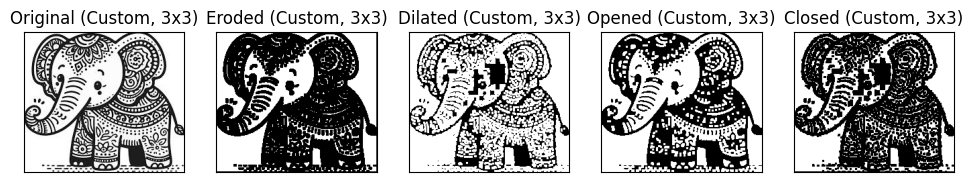

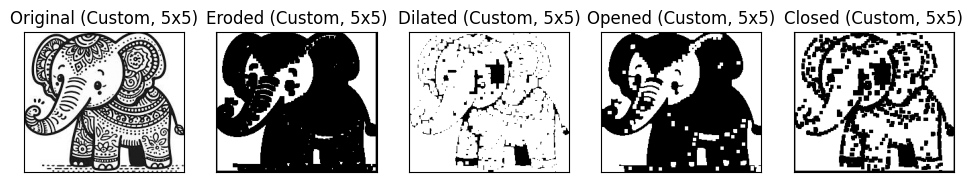

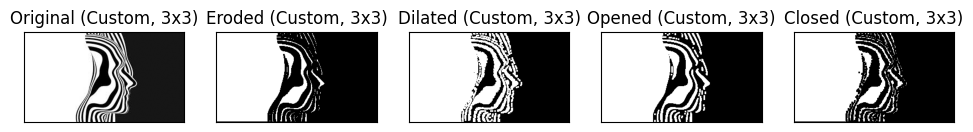

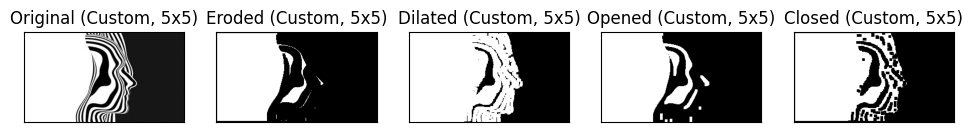

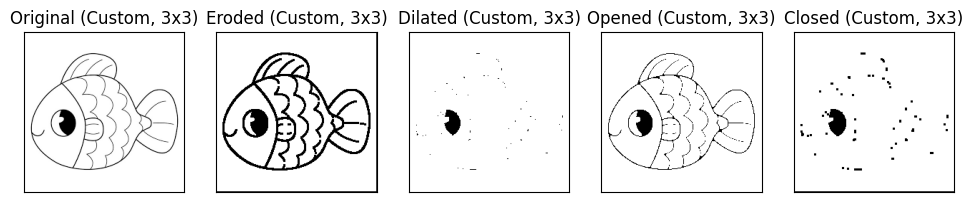

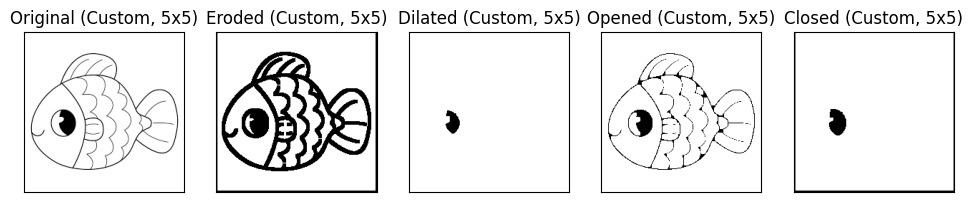

In [67]:
for img2 in images:
    # Load image in grayscale
    image = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)

    for k_size in kernel_sizes:
        kernel = np.ones(k_size, np.uint8)  # Define kernel of current size

        # Apply custom implementations
        eroded = Custom_Erosion(image, kernel)
        dilated = Custom_Dilation(image, kernel)
        opened = Custom_Opening(image, kernel)
        closed = Custom_Closing(image, kernel)



        operations = ['Original', 'Eroded', 'Dilated', 'Opened', 'Closed']
        custom_images = [image, eroded, dilated, opened, closed]

        plt.figure(figsize=(12, 8))
        for i in range(5):
            plt.subplot(1, 5, i+1)
            plt.imshow(custom_images[i], cmap='gray')
            plt.title(f"{operations[i]} (Custom, {k_size[0]}x{k_size[1]})")
            plt.xticks([]), plt.yticks([])

        plt.show()


Observations of Custom Implementaion:

####Erosion:

For 3×3 Kernel: The fine details of objects shrink as expected, but some small structures disappear completely.

For 5×5 Kernel: More aggressive shrinking occurs, leading to excessive removal of details, especially in thin or small regions.

Compared to OpenCV: The erosion effect is slightly stronger, likely due to strict kernel matching in the custom implementation.



#### Dilation :

For 3×3 Kernel: The objects expand moderately, and small gaps are reduced.

For 5×5 Kernel: The objects become thicker, and details start merging, particularly in the elephant and face images.

Compared to OpenCV: The results are similar, but the custom implementation might over-expand certain areas due to edge handling.

#### Opening:
For 3×3 Kernel: Small noise is reduced effectively, but some fine structures are also lost.

For 5×5 Kernel: The image gets too simplified, and many thin parts vanish completely.

Compared to OpenCV: The custom implementation is slightly more aggressive, likely due to stricter erosion.

####Closing :
For 3×3 Kernel: Small gaps are filled, but some parts don’t fully connect.

For 5×5 Kernel: Larger gaps are filled, but some regions appear over-closed.

Compared to OpenCV: The effect is stronger in the custom version, possibly due to dilation being applied more broadly.


####Conclusion:

OpenCV's implementation is optimized for better edge handling, smoother transitions, and efficiency.

The custom implementation is more aggressive, making erosion and dilation stronger than necessary in some cases.

For better accuracy, fine-tuning the kernel behavior in the custom approach is necessary to match OpenCV’s results more closely.